In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("./WineQT.csv")
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [10]:
dataframe.shape

(1143, 12)

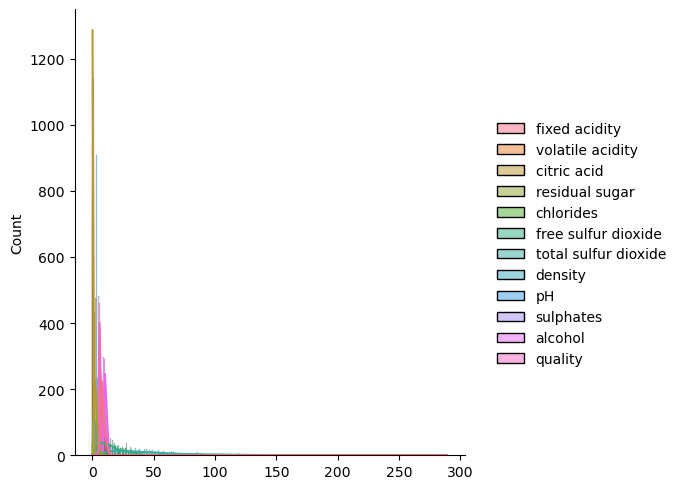

In [11]:
sns.displot(dataframe, kde=True)

In [7]:
X = dataframe.drop(columns=["quality"], axis=1)
y = dataframe["quality"]

In [18]:
# Outlier Removal
cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]

mask = np.ones(dataframe.shape[0], dtype=bool)

for col in cols:
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    IQR = Q3 - Q1
    lowerWhisker = Q1 - 1.5 * IQR
    upperWhisker = Q3 + 1.5 * IQR
    mask &= (dataframe[col] >= lowerWhisker) & (dataframe[col] <= upperWhisker)

X = X[mask]
y = y[mask]

/var/folders/hb/k7qx35xx13dc1rhhhkjbjrnh0000gp/T/ipykernel_15750/469401290.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[mask]


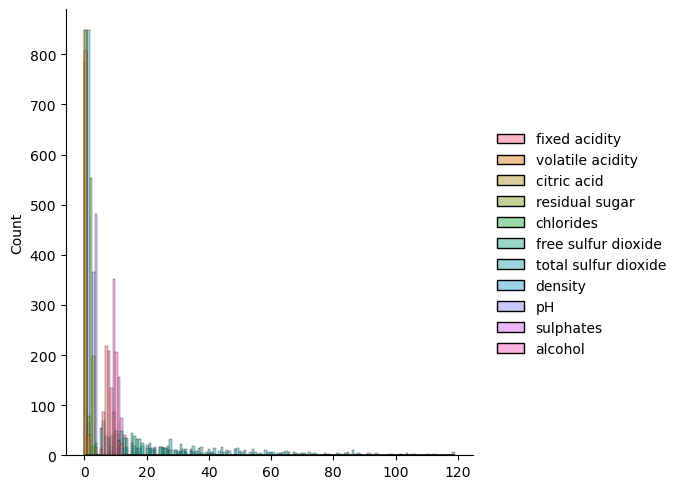

In [19]:
sns.displot(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()  # By Default 100 Decision Trees
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
model.score(X_test_scaled, y_test)

0.7216981132075472

In [28]:
y_pred = model.predict(X_test_scaled)
y_pred

array([7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 5, 6, 5, 8, 5, 6, 5, 6, 5, 5, 7,
       6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7,
       6, 6, 5, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       6, 6, 7, 7, 6, 5, 5, 5, 6, 6, 5, 5, 8, 6, 6, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 6, 7,
       6, 5, 6, 6, 5, 7, 7, 5, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 5, 5, 5, 7,
       5, 7, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6,
       5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 5])

In [30]:
model.estimators_  # Contains all individual Decision Tree that make up classifier

[DecisionTreeClassifier(max_features='sqrt', random_state=1062724250),
 DecisionTreeClassifier(max_features='sqrt', random_state=1373003976),
 DecisionTreeClassifier(max_features='sqrt', random_state=1918287069),
 DecisionTreeClassifier(max_features='sqrt', random_state=1255328151),
 DecisionTreeClassifier(max_features='sqrt', random_state=1304405932),
 DecisionTreeClassifier(max_features='sqrt', random_state=728683855),
 DecisionTreeClassifier(max_features='sqrt', random_state=664470898),
 DecisionTreeClassifier(max_features='sqrt', random_state=1768046979),
 DecisionTreeClassifier(max_features='sqrt', random_state=1139493698),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480528037),
 DecisionTreeClassifier(max_features='sqrt', random_state=86193324),
 DecisionTreeClassifier(max_features='sqrt', random_state=1344566578),
 DecisionTreeClassifier(max_features='sqrt', random_state=776259549),
 DecisionTreeClassifier(max_features='sqrt', random_state=1154135351),
 DecisionTr

[Text(0.5619429117147708, 0.96875, 'x[2] <= 0.465\ngini = 0.624\nsamples = 394\nvalue = [1.0, 21.0, 260.0, 283.0, 63.0, 8.0]'),
 Text(0.2543505942275042, 0.90625, 'x[7] <= -0.514\ngini = 0.587\nsamples = 275\nvalue = [0, 20, 206, 200, 21, 2]'),
 Text(0.40814675297113756, 0.9375, 'True  '),
 Text(0.11375212224108659, 0.84375, 'x[5] <= -0.829\ngini = 0.612\nsamples = 88\nvalue = [0, 8, 42, 80, 16, 2]'),
 Text(0.05432937181663837, 0.78125, 'x[9] <= -0.27\ngini = 0.557\nsamples = 19\nvalue = [0, 3, 20, 6, 3, 0]'),
 Text(0.03395585738539898, 0.71875, 'x[6] <= -1.207\ngini = 0.382\nsamples = 15\nvalue = [0, 1, 20, 4, 1, 0]'),
 Text(0.013582342954159592, 0.65625, 'x[2] <= -0.086\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 0, 3, 1, 0]'),
 Text(0.006791171477079796, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(0.02037351443123939, 0.59375, 'x[4] <= 0.423\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 0, 1, 0]'),
 Text(0.013582342954159592, 0.53125, 'gini = 0.0\nsamples = 1\

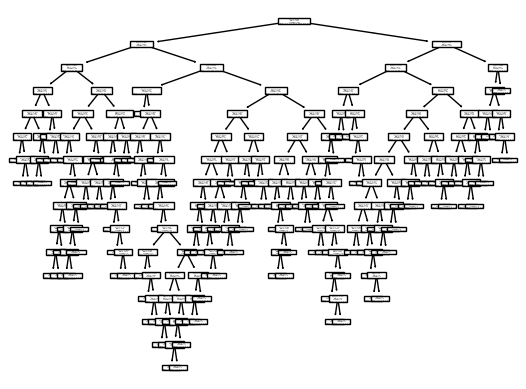

In [31]:
from sklearn.tree import plot_tree

plot_tree(model.estimators_[0])

# HyperParameter Tuning

- GridSearchCV
- RandomSearchCV


# GridSearchCV


In [35]:
grid_param = {
    "n_estimators": [100, 150],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(5),
}

In [36]:
from sklearn.model_selection import GridSearchCV

rf_gridSearch = GridSearchCV(
    estimator=model, param_grid=grid_param, cv=10, n_jobs=-1, verbose=1
)
rf_gridSearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._vali

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(0, 5), 'n_estimators': [100, 150]},
             verbose=1)

In [37]:
rf_gridSearch.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 150}

In [50]:
rf_gridSearch.best_score_

0.6114335317460318

In [38]:
model_BestParamsGrid = RandomForestClassifier(
    criterion="entropy", max_depth=4, n_estimators=150
)
model_BestParamsGrid.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150)

In [39]:
model_BestParamsGrid.score(X_test_scaled, y_test)

0.6839622641509434

# RandomizedSearchCV

- Less Training Time


In [44]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {
    "n_estimators": [100, 150],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(5),
}
random_model = RandomizedSearchCV(
    estimator=model,
    param_distributions=grid_params,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
)

In [45]:
random_model.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._valida

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(0, 5),
                                        'n_estimators': [100, 150]},
                   scoring='accuracy')

In [46]:
random_model.best_params_

{'n_estimators': 150, 'max_depth': 4, 'criterion': 'log_loss'}

In [48]:
random_model.best_score_

0.5975024606299212

In [49]:
model_BestParamsRandom = RandomForestClassifier(
    n_estimators=150, max_depth=4, criterion="log_loss"
)
model_BestParamsRandom.fit(X_train_scaled, y_train)
model_BestParamsRandom.score(X_test_scaled, y_test)

0.6839622641509434